# **McDonald's Menu Exploratory Data Analysis**<br>
Exploratory Data Analysis of Nutrition Facts for McDonald's menu

# General dataset analysis

# Library

In [ ]:
pip install pandas

In [ ]:
# Mengimport Library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
#df = pd.read_csv('../content/menu.csv') # Read the dataset

# Data Import

In [ ]:
from google.colab import files
 
uploaded = files.upload()
df = pd.read_csv("menu.csv")
print(df.shape[0])

In [ ]:
df.head() #Menampilkan 5 baris pertama dari dataset

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.describe(include="all") # Mengenerate descriptive statistics

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Frappé Chocolate Chip (Medium),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [ ]:
df.info() # Mengenerate info dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
df.isnull().values.any() # Periksa apakah ada missing value

False

In [ ]:
df.Category.unique() # Get the menu categories

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

# Case 1

# Average Meal Calories

Masalah # 1 Berapa banyak kalori yang terkandung dalam rata-rata Value Meal McDonald's?
Catatan: 'Kalori dari Lemak' termasuk dalam 'Calories' jadi kita hanya perlu menghitung rata-rata kalori dari 'Calories'.

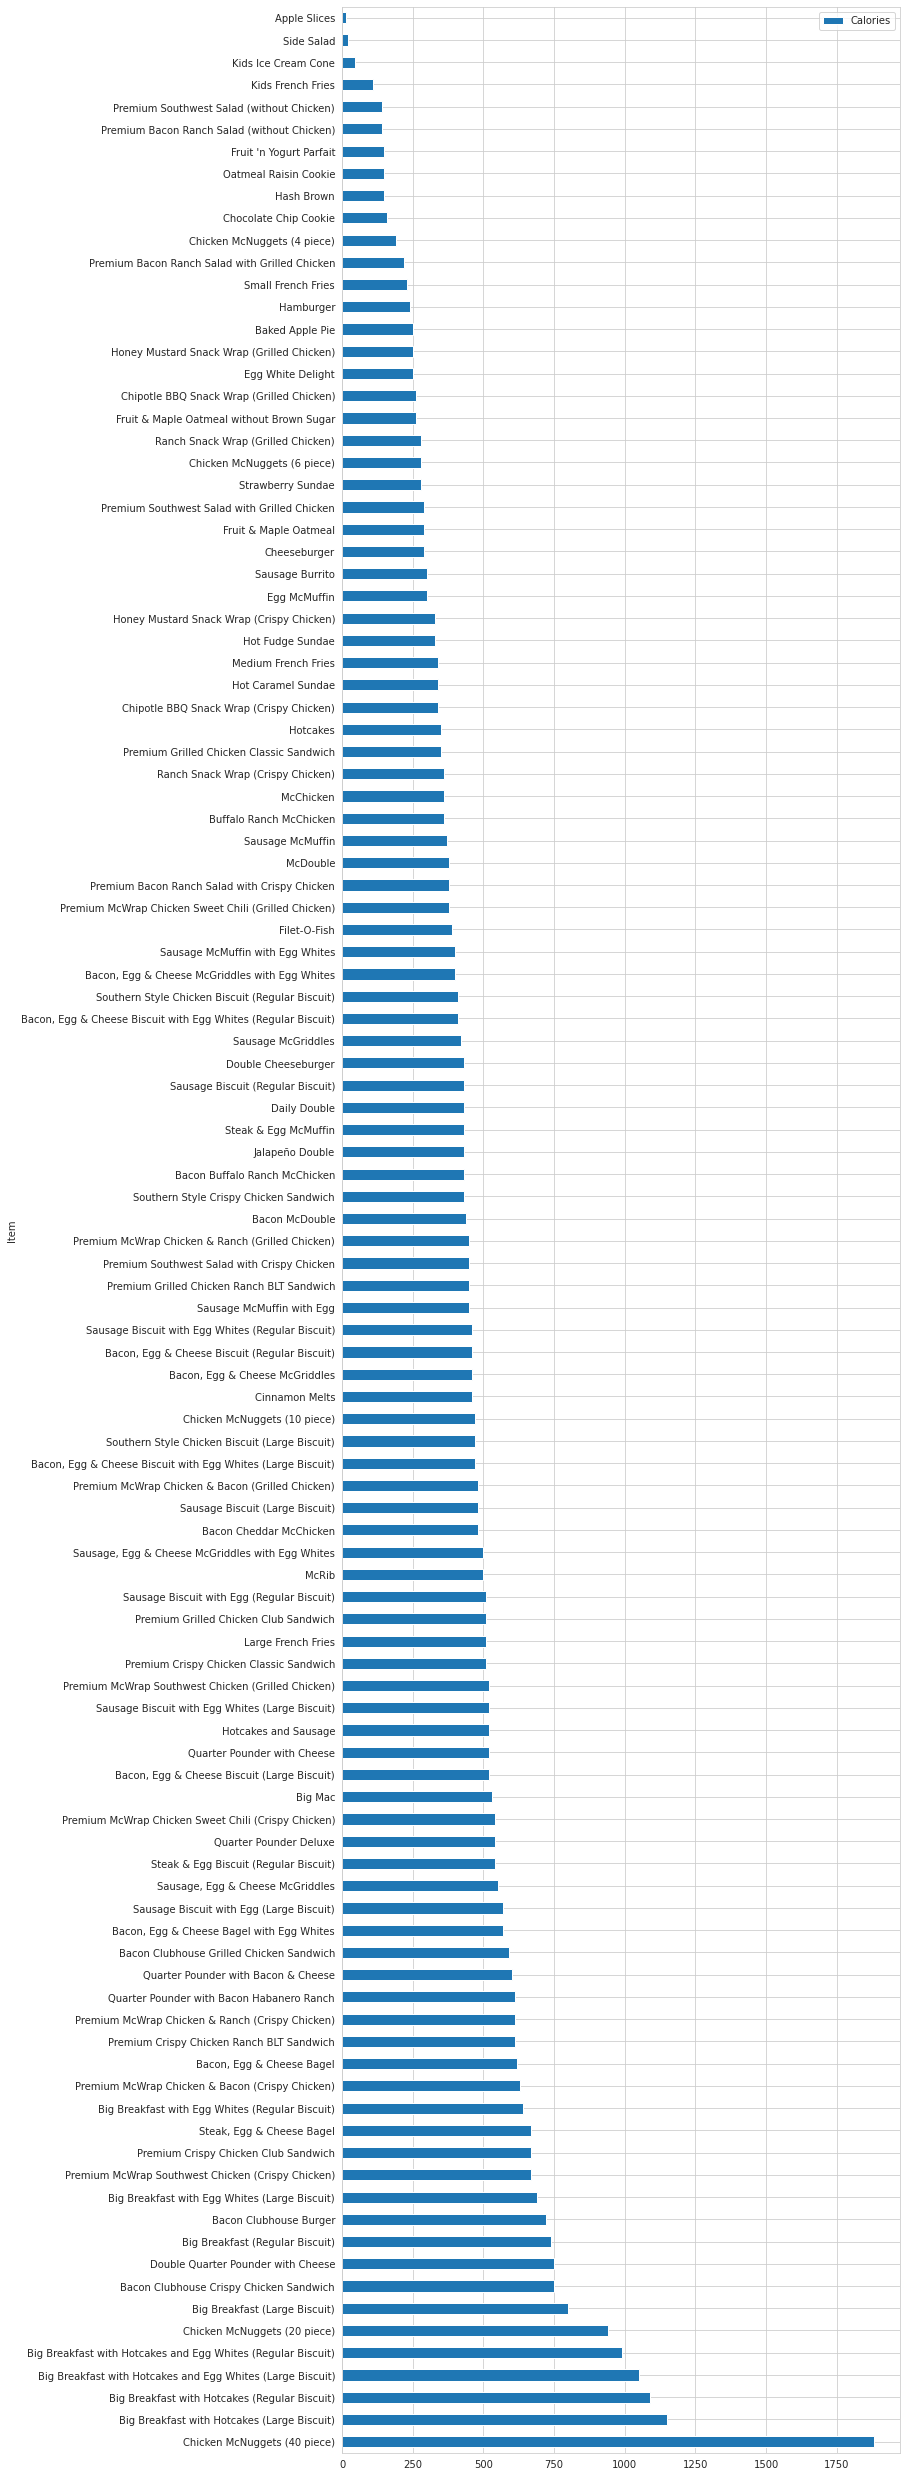

In [ ]:
import matplotlib.pyplot as plt

meals = df.head(110) # All meals (without drinks) are in first 110 rows of the dataset
meals_cal = pd.DataFrame({'Item': meals.Item, 'Calories': meals.Calories}) # Select only Items and Calories columns
meals_sort = meals_cal.sort_values('Calories', ascending=False) # Sort by calories
meals_sort.plot.barh(x='Item', y='Calories', figsize= (10,45)) # Plot horizontal bar
plt.show()

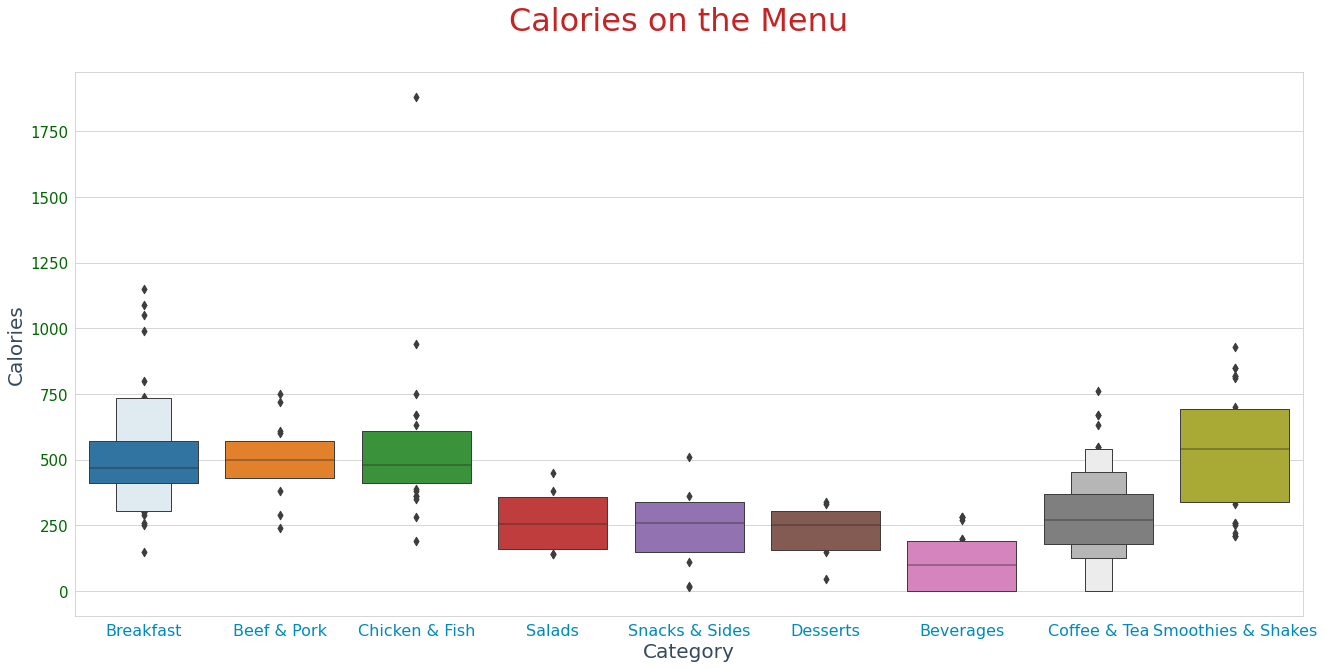

In [ ]:
# Distribution of Calories in each Menu Categoty
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))

ax = sns.boxenplot(x='Category', y='Calories', data=df)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Calories on the Menu  \n", loc="center",size=32,color='#be0c0c',alpha=0.9)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calories',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

plt.show()

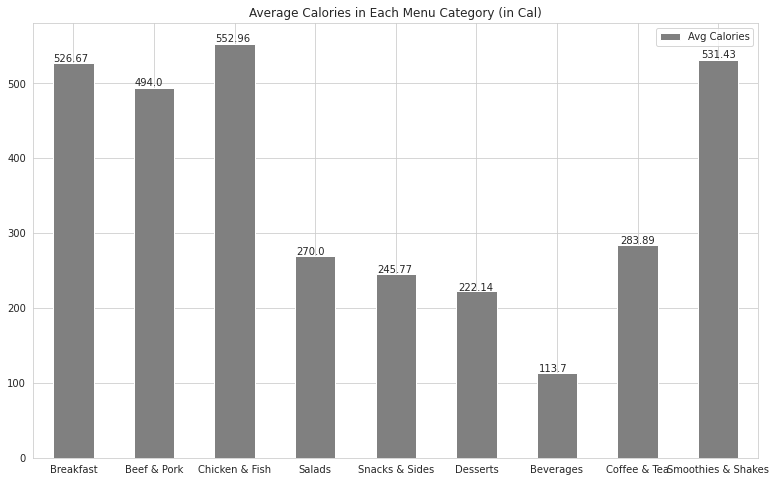

In [ ]:
# Tentukan DataFrame untuk setiap kategori
brkf = df.loc[df.Category == 'Breakfast']
bnp = df.loc[df.Category == 'Beef & Pork']
cnf = df.loc[df.Category == 'Chicken & Fish']
sld = df.loc[df.Category == 'Salads']
snass = df.loc[df.Category == 'Snacks & Sides']
dess = df.loc[df.Category == 'Desserts'] 
bev = df.loc[df.Category == 'Beverages']
cnt = df.loc[df.Category == 'Coffee & Tea']
ss = df.loc[df.Category == 'Smoothies & Shakes']

# Rata-rata kalori pada setiap kategori
avg_cat = [round(brkf['Calories'].mean(axis=0), 2), round(bnp['Calories'].mean(axis=0), 2), round(cnf['Calories'].mean(axis=0), 2),
          round(sld['Calories'].mean(axis=0), 2), round(snass['Calories'].mean(axis=0), 2), round(dess['Calories'].mean(axis=0), 2),
          round(bev['Calories'].mean(axis=0), 2), round(cnt['Calories'].mean(axis=0), 2), round(ss['Calories'].mean(axis=0), 2)]
index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes']
avg_calat= pd.DataFrame({'Avg Calories': avg_cat}, index=index)
ax = avg_calat.plot.bar(rot=0, color='gray', figsize=(13,8), title='Average Calories in Each Menu Category (in Cal)', legend=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#ax.set_title("# Rata-rata kalori pada setiap kategori (in Cal)")

In [ ]:
print("Average calories of all McD's meals (include drinks) is ", round(df['Calories'].mean(axis=0), 2), "Cal.") #average calories of all meals (include drinks)
print("Average calories of all McD's meals (drinks excluded) is ", round(meals.Calories.mean(axis=0), 2), "Cal.") #average calories of meals (no drinks)

Average calories of all McD's meals (include drinks) is  368.27 Cal.
Average calories of all McD's meals (drinks excluded) is  462.09 Cal.


# Case 2

# Drink the Calories!

Problem #2 How much do beverages, like soda or coffee, contribute to the overall caloric intake? <br>
In McD there are several categories of drinks, which are 'Beverages', 'Coffee & Tea', and 'Smoothies and Shakes'. Let's see the analysis from each item to average calorie of all drinks.

In [ ]:
# Category: Beverages
#bev = df.loc[df.Category == 'Beverages']

In [ ]:
# Get caloric intake contribution from Beverages category
cal_bev = pd.DataFrame({'Item': bev.Item, 'Calories': bev.Calories})
cal_bev['Men'] = cal_bev.Calories/2500
cal_bev['Women'] = cal_bev.Calories/2000
cal_bev

NameError: ignored

In [ ]:
# Average Calories in 'Beverages' Category
avg_bev = bev['Calories'].mean(axis=0)
print("Average calories of 'Beverages' category is", round(avg_bev, 2))

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men.
avg_bev = pd.to_numeric(avg_bev) 
bev_men = avg_bev/2500
print("Averagely 'Beverages' contributes to men's calories intake for ", round(bev_men,2))

bev_women = avg_bev/2000
print("Averagely 'Beverages' contributes to women's calories intake for ", round(bev_women, 2))

In [ ]:
# Category: Coffee & Tea
#cnt = df.loc[df.Category == 'Coffee & Tea']

In [ ]:
# Get caloric intake contribution from Coffee & Tea category
cal_cnt = pd.DataFrame({'Item': cnt.Item, 'Calories': cnt.Calories})
cal_cnt['Men'] = cal_cnt.Calories/2500
cal_cnt['Women'] = cal_cnt.Calories/2000
cal_cnt

In [ ]:
# Average Calories in 'Coffee & Tea' Category
avg_cnt = cnt['Calories'].mean(axis=0)
print("Average calories of 'Coffee & Tea' category is", round(avg_cnt, 2))

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men.
avg_cnt = pd.to_numeric(avg_cnt)
cnt_men = avg_cnt/2500
print("Averagely 'Coffee & Tea' contributes to men's calories intake for ", round(cnt_men, 2))

cnt_women = avg_cnt/2000
print("Averagely 'Coffee & Tea' contributes to women's calories intake for ", round(cnt_women, 2))

In [ ]:
# Category: Smoothies & Shakes
#ss = df.loc[df.Category == 'Smoothies & Shakes']

In [ ]:
# Get caloric intake contribution from Smoothies & Shakes category
cal_ss = pd.DataFrame({'Item': ss.Item, 'Calories': ss.Calories})
cal_ss['Men'] = cal_ss.Calories/2500
cal_ss['Women'] = cal_ss.Calories/2000
cal_ss

In [ ]:
# Average Calories in 'Smoothies & Shakes' Category
avg_ss = ss['Calories'].mean(axis=0)
print("Average calories of 'Smoothies & Shakes' category is", round(avg_ss, 2))

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men.
avg_ss = pd.to_numeric(avg_ss)
ss_men = avg_ss/2500
print("Averagely 'Smoothies & Shakes' contributes to men's calories intake for ", round(ss_men, 2))

ss_women = avg_ss/2000
print("Averagely 'Coffee & Tea' contributes to women's calories intake for ", round(ss_women, 2))

Let's see for all drink options

In [ ]:
drink = df.tail(150)
avg_drink = drink['Calories'].mean(axis=0)
print("Average calories of all drinks is", round(avg_drink, 2))

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men.
avg_drink = pd.to_numeric(avg_drink)
drink_men = avg_drink/2500
print("Averagely drink options contributes to men's calories intake for ", round(drink_men, 2))

drink_women = avg_drink/2000
print("Averagely drink options contributes to women's calories intake for ", round(drink_women, 2))

# Case 3

# Grilled Chicken vs Crispy Chicken


Problem #3 Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?<br>
The nutritional value of foods, including meat and meat products, can be defined in a number of different ways, from simply listing the quantities of various nutrients contained in the foods, to considering biological factors that affect the utilization of these nutrients by the body. -P.A. Lofgren, in Encyclopedia of Human Nutrition (Third Edition), 2013.<br> 
There are five major classes of nutrients: proteins, lipids (fat), carbohydrates, vitamins, and minerals.

Text(0.5, 1.0, 'Total Calories in Crispy Chicken Item Category (in Cal)')

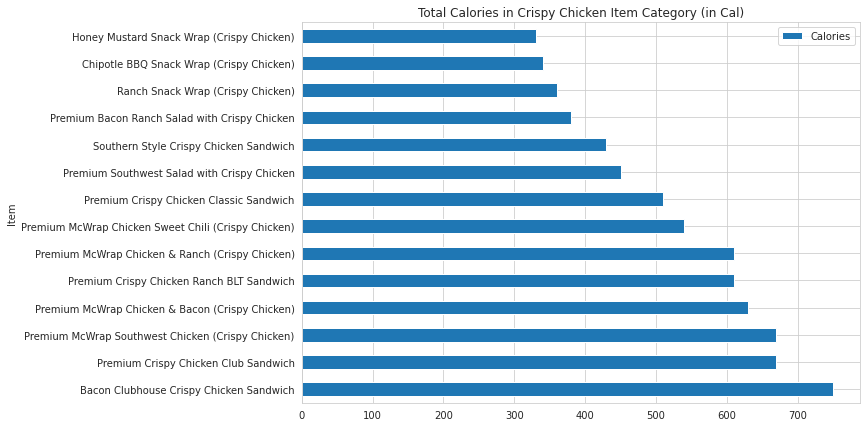

In [ ]:
# Exploring the amount of calories on Crispy Chicken category
crispy = df[df['Item'].str.contains('Crispy Chicken')]
crispy_cal = pd.DataFrame({'Item': crispy.Item, 'Calories': crispy.Calories})
crispy_sort = crispy_cal.sort_values('Calories', ascending=False)
ax = crispy_sort.plot.barh(x='Item', y='Calories', figsize= (10,7))
ax.set_title("Total Calories in Crispy Chicken Item Category (in Cal)")

In [ ]:
# Average calories on Crispy Chicken Category
avg_crispy_cal = crispy.Calories.mean(axis=0)
print("Average calories on Crispy Chicken category is ", avg_crispy_cal, "Cal.")

Average calories on Crispy Chicken category is  520.0 Cal.


Text(0.5, 1.0, 'Total Calories in Grilled Chicken Item Category (in Cal)')

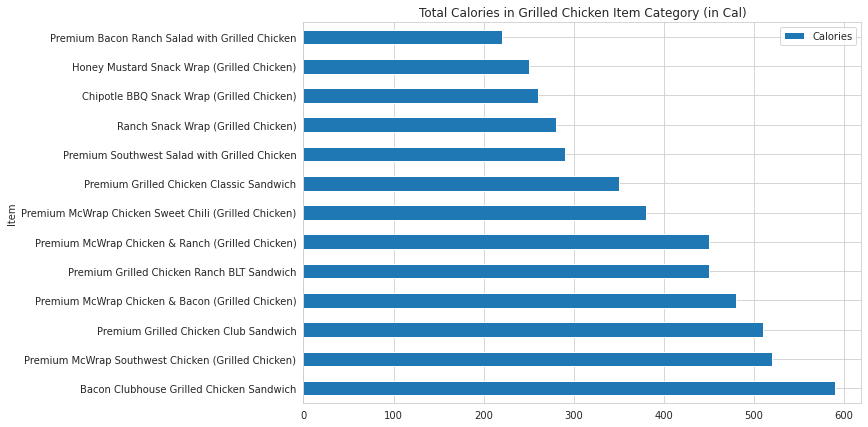

In [ ]:
# Exploring the amount of calories on Grilled Chicken category
grilled = df[df['Item'].str.contains('Grilled Chicken')]
grilled_cal = pd.DataFrame({'Item': grilled.Item, 'Calories': grilled.Calories})
grilled_sort = grilled_cal.sort_values('Calories', ascending=False)
ax = grilled_sort.plot.barh(x='Item', y='Calories', figsize= (10,7))
ax.set_title("Total Calories in Grilled Chicken Item Category (in Cal)")

In [ ]:
# Average calories on Grilled Chicken Category
avg_grilled_cal = round(grilled.Calories.mean(axis=0), 2)
print("Average calories on Grilled Chicken category is ", avg_grilled_cal, "Cal.")

Average calories on Grilled Chicken category is  386.92 Cal.


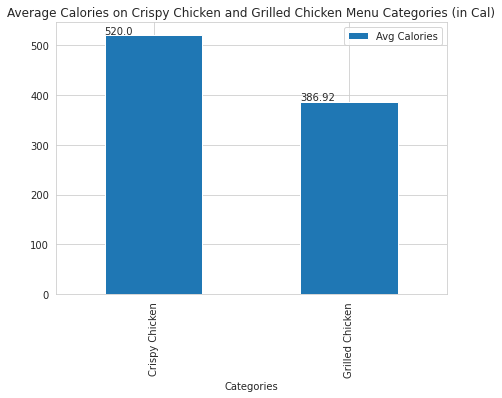

In [ ]:
# Get visual comparison of Crispy vs Grilled on calories
avg_cal = pd.DataFrame({'Categories':['Crispy Chicken', 'Grilled Chicken'], 'Avg Calories': [avg_crispy_cal, avg_grilled_cal]})
ax = avg_cal.plot.bar(x = 'Categories', y = 'Avg Calories', figsize=(7,5))
ax.set_title("Average Calories on Crispy Chicken and Grilled Chicken Menu Categories (in Cal)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can conclude that Crispy Chicken category has higher average calories than Grilled Chicken category.

Now take a look at the Cholesterol and Sodium inside those categories.

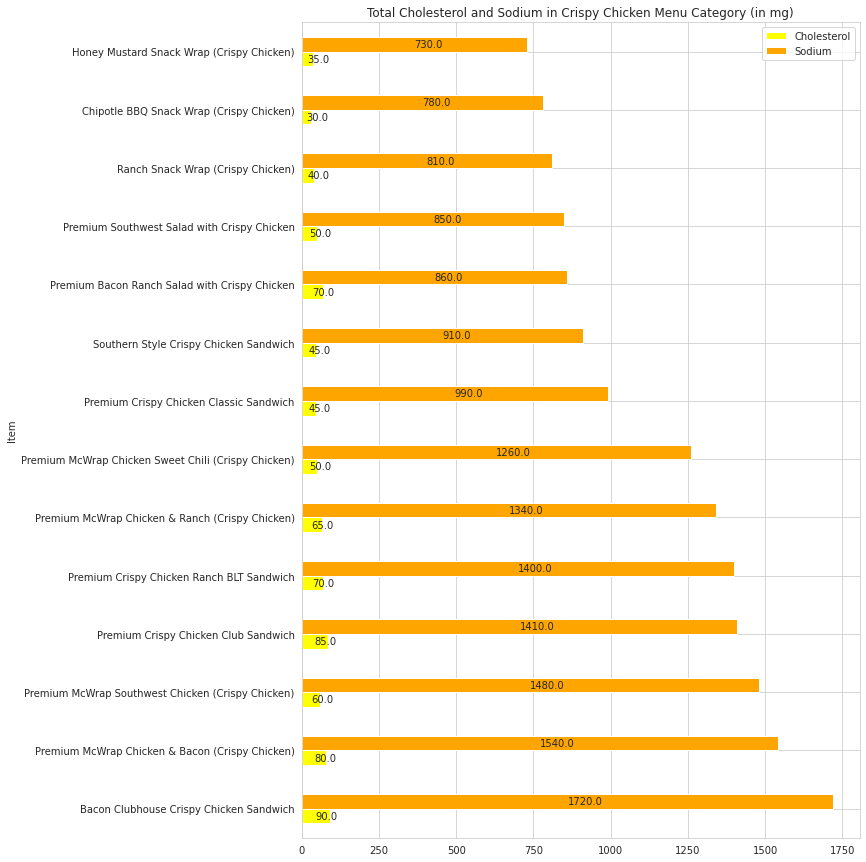

In [ ]:
# Get the amount of cholesterol and sodium in Crispy Chicken category
crispy_chsod = pd.DataFrame({'Item': crispy.Item, 'Cholesterol': crispy.Cholesterol, 'Sodium': crispy.Sodium})
crispy_chsod_sort = crispy_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = crispy_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['yellow', 'orange'])
ax.set_title("Total Cholesterol and Sodium in Crispy Chicken Menu Category (in mg)")
#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_x() * 1.005, p.get_width() * 1.005))
#ax = crispy.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

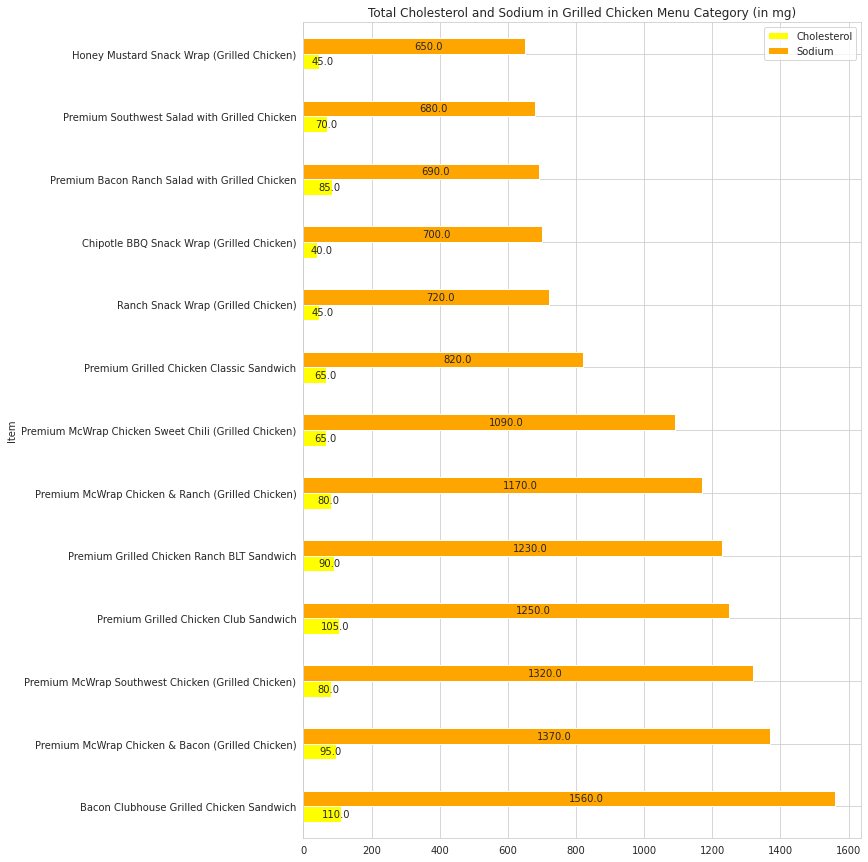

In [ ]:
# Get the amount of cholesterol and sodium in Grilled Chicken category
grilled_chsod = pd.DataFrame({'Item': grilled.Item, 'Cholesterol': grilled.Cholesterol, 'Sodium': grilled.Sodium})
grilled_chsod_sort = grilled_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = grilled_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['yellow', 'orange'])
ax.set_title("Total Cholesterol and Sodium in Grilled Chicken Menu Category (in mg)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Note: The amount of cholesterol in this menu set is not always directly proportional to the amount of sodium. For example, Premium Crispy Chicken Club Sandwich with 1410mg of sodium has 85mg of cholesterol, while Premium McWrap Southwest Chicken (Crispy Chicken) with 1480mg of sodium (which is higher than the previous item) only has 65mg of cholesterol.

So does in Grilled Chicken category, Premium Grilled Chicken Club Sandwich with 1250mg of sodium has 105mg of cholesterol, while Premium McWrap Southwest Chicken (Grilled Chicken) with 1370mg of sodium has 95mg of cholesterol.

Now let's compare the average amount of those nutrients in both categories.

In [ ]:
# Get the average of sodium and cholesterol amount in Crispy Chicken category
avg_crispy_sod = round(crispy.Sodium.mean(axis=0), 2)
avg_crispy_ch = round(crispy.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Crispy Chicken category is ", avg_crispy_sod, "mg, while the average amount of cholesterol is ", avg_crispy_ch, "mg.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_grilled_sod = round(grilled.Sodium.mean(axis=0), 2)
avg_grilled_ch = round(grilled.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Grilled Chicken category is ", avg_grilled_sod, "mg, while the average amount of cholesterol is ", avg_grilled_ch, "mg.")

The average amount of sodium in Crispy Chicken category is  1148.57 mg, while the average amount of cholesterol is  58.21 mg.
The average amount of sodium in Grilled Chicken category is  1019.23 mg, while the average amount of cholesterol is  75.0 mg.


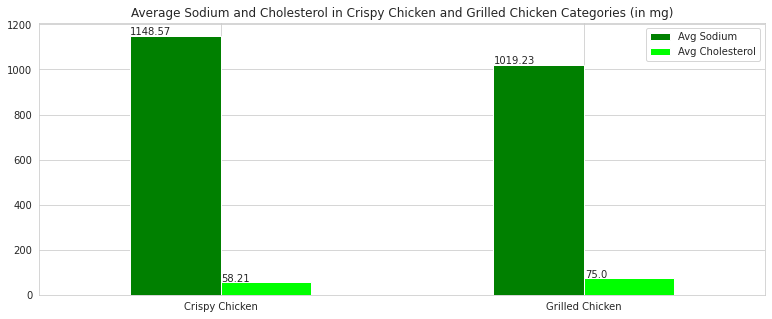

In [ ]:
# Plot a bar chart for visual comparison
avg_sod = [avg_crispy_sod, avg_grilled_sod]
avg_ch = [avg_crispy_ch, avg_grilled_ch]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_sodch = pd.DataFrame({'Avg Sodium': avg_sod,
                   'Avg Cholesterol': avg_ch}, index=index)
ax = avg_sodch.plot.bar(rot=0, color=['green', 'lime'], figsize=(13,5))
ax.set_title("Average Sodium and Cholesterol in Crispy Chicken and Grilled Chicken Categories (in mg)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#plt.barh(['Avg Sodium on Crispy Chicken items', 'Avg Cholesterol on Crispy Chicken items', 'Avg Sodium on Grilled Chicken items', 'Avg Cholesterol on Grilled Chicken items'], [avg_crispy_sod, avg_crispy_ch, avg_grilled_sod, avg_grilled_ch])

We can concluded that Crispy Chicken category is higher in average sodium amount and lower in average cholesterol amount than Grilled Chicken Category

Reported from US Department of Agriculture, Carbohydrates provide 4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram. (https://www.nal.usda.gov/fnic/how-many-calories-are-one-gram-fat-carbohydrate-or-protein). So the amount of those 3 nutrients is already depicted in calories chart.

Now take a look on the amount of sugar and dietary fiber in both categories.

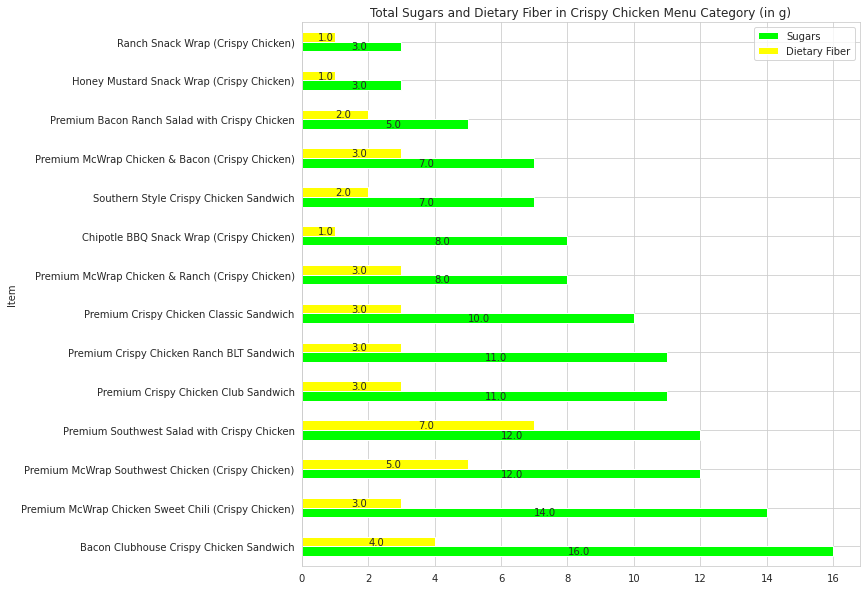

In [ ]:
# Get the amount of sugar and dietary fiber in Crispy Chicken category
crispy_sdf = pd.DataFrame({'Item': crispy.Item, 'Sugars': crispy.Sugars, 'Dietary Fiber': crispy['Dietary Fiber']})
crispy_sdf_sort = crispy_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = crispy_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['lime', 'yellow'])
ax.set_title("Total Sugars and Dietary Fiber in Crispy Chicken Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

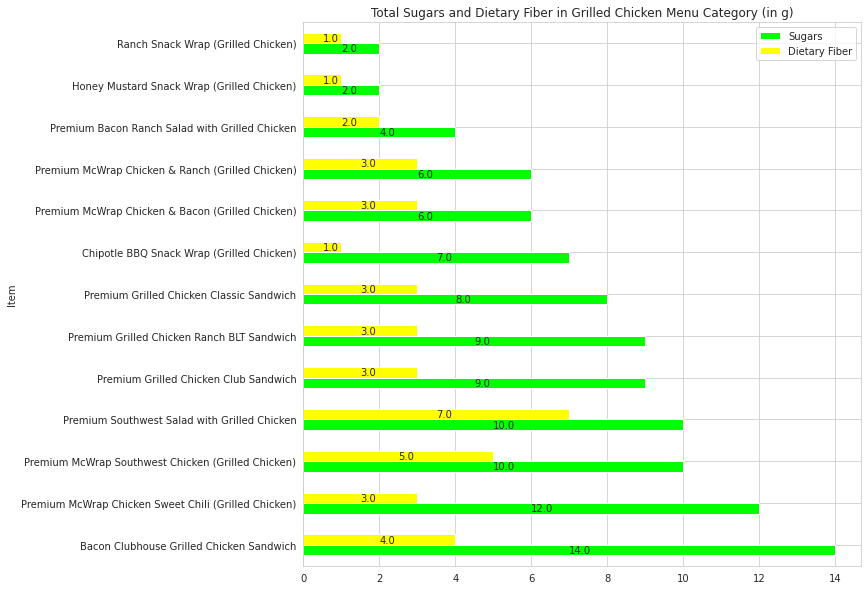

In [ ]:
# Get the amount of sugar and dietary fiber in Grilled Chicken category
grilled_sdf = pd.DataFrame({'Item': grilled.Item, 'Sugars': grilled.Sugars, 'Dietary Fiber': grilled['Dietary Fiber']})
grilled_sdf_sort = grilled_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = grilled_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['lime', 'yellow'])
ax.set_title("Total Sugars and Dietary Fiber in Grilled Chicken Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of sugars and dietary fiber on both categories.

In [ ]:
# Get the average of sugars and dietary fiber amount in Crispy Chicken category
avg_crispy_sug = round(crispy.Sugars.mean(axis=0), 2)
avg_crispy_df = round(crispy['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Crispy Chicken category is ", avg_crispy_sug, "g, while the average amount of dietary fiber is ", avg_crispy_df, "g.")

# Get the average of sugars and dietary fiber amount in Grilled Chicken category
avg_grilled_sug = round(grilled.Sugars.mean(axis=0), 2)
avg_grilled_df = round(grilled['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Grilled Chicken category is ", avg_grilled_sug, "g, while the average amount of dietary fiber is ", avg_grilled_df, "g.")

The average amount of sugars in Crispy Chicken category is  9.07 g, while the average amount of dietary fiber is  2.93 g.
The average amount of sugars in Grilled Chicken category is  7.62 g, while the average amount of dietary fiber is  3.0 g.


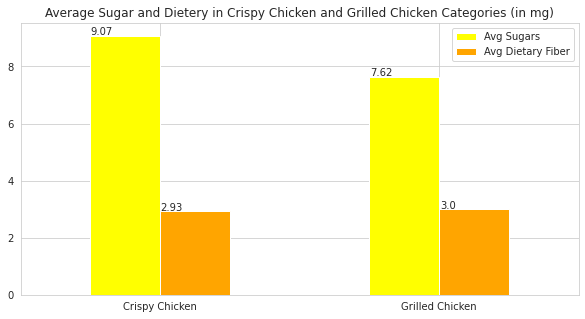

In [ ]:
# Plot a bar chart for visual comparison
avg_sug = [avg_crispy_sug, avg_grilled_sug]
avg_df = [avg_crispy_df, avg_grilled_df]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_sdf = pd.DataFrame({'Avg Sugars': avg_sug,
                   'Avg Dietary Fiber': avg_df}, index=index)
ax = avg_sdf.plot.bar(rot=0, color=['yellow', 'orange'], figsize=(10,5))
ax.set_title("Average Sugar and Dietery in Crispy Chicken and Grilled Chicken Categories (in mg)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can concluded that Crispy Chicken category has higher average amount of sugar and lower average amount of dietary fiber than Grilled Chicken category.

Now take a look on the amount of vitamins and minerals in both categories. the types of vitamins and minerals that are in the dataset are vitamin A & C, calcium, and iron. All in daily value percentages (%DV).

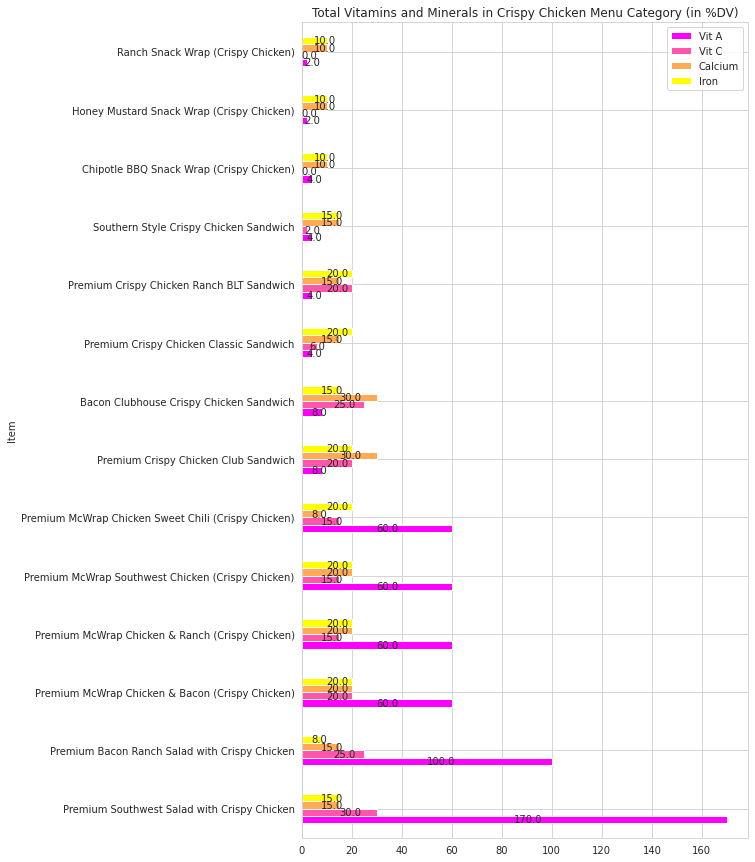

In [ ]:
# Get the amount of vitamins and minerals in Crispy Chicken category
crispy_vm = pd.DataFrame({'Item': crispy.Item, 'Vit A': crispy['Vitamin A (% Daily Value)'], 'Vit C': crispy['Vitamin C (% Daily Value)'], 'Calcium': crispy['Calcium (% Daily Value)'], 'Iron': crispy['Iron (% Daily Value)']})
crispy_vm_sort = crispy_vm.sort_values('Vit A', ascending=False) #sort by vit A amount
ax = crispy_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='spring')
ax.set_title("Total Vitamins and Minerals in Crispy Chicken Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

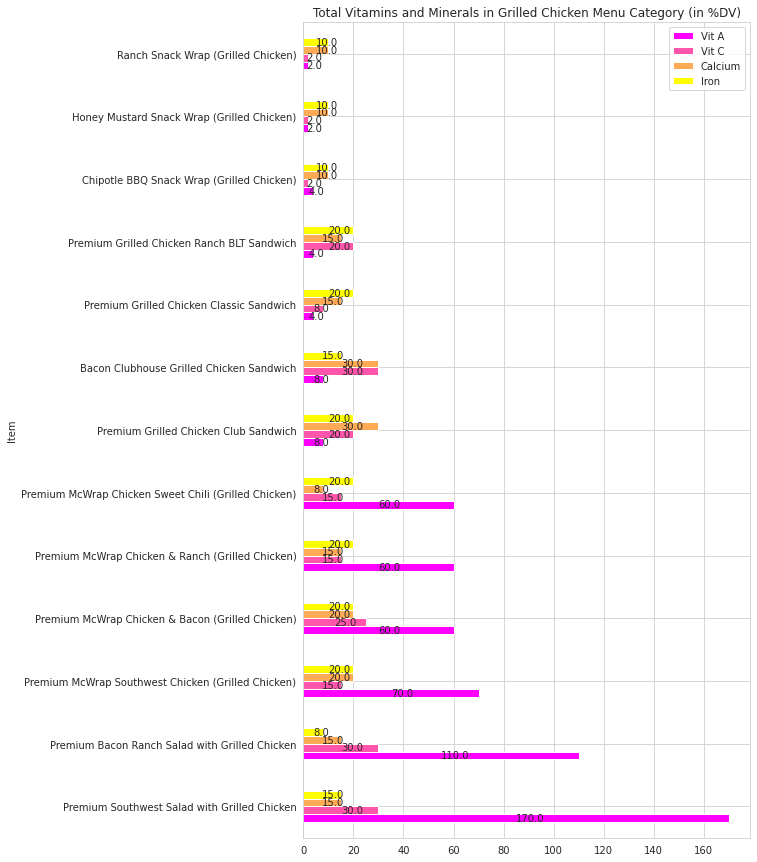

In [ ]:
# Get the amount of vitamins and minerals in Grilled Chicken category
grilled_vm = pd.DataFrame({'Item': grilled.Item, 'Vit A': grilled['Vitamin A (% Daily Value)'], 'Vit C': grilled['Vitamin C (% Daily Value)'], 'Calcium': grilled['Calcium (% Daily Value)'], 'Iron': grilled['Iron (% Daily Value)']})
grilled_vm_sort = grilled_vm.sort_values('Vit A', ascending=False) #sort by vit A amount
ax = grilled_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='spring')
ax.set_title("Total Vitamins and Minerals in Grilled Chicken Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of vitamins and minerals on both categories

In [ ]:
# Get the average of vitamins and minerals in Crispy Chicken category
avg_crispy_vita = round(crispy_vm['Vit A'].mean(axis=0), 2)
avg_crispy_vitc = round(crispy_vm['Vit C'].mean(axis=0), 2)
avg_crispy_calc = round(crispy_vm['Calcium'].mean(axis=0), 2)
avg_crispy_iron = round(crispy_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Crispy Chicken category is ", avg_crispy_vita, "%DV,", avg_crispy_vitc, "%DV,", avg_crispy_calc, "%DV, and", avg_crispy_iron, "%DV.")

# Get the average of vitamins and minerals in Grilled Chicken category
avg_grilled_vita = round(grilled_vm['Vit A'].mean(axis=0), 2)
avg_grilled_vitc = round(grilled_vm['Vit C'].mean(axis=0), 2)
avg_grilled_calc = round(grilled_vm['Calcium'].mean(axis=0), 2)
avg_grilled_iron = round(grilled_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Grilled Chicken category is ", avg_grilled_vita, "%DV,", avg_grilled_vitc, "%DV,", avg_grilled_calc, "%DV, and", avg_grilled_iron, "%DV.")

The average amount of Vit A, Vit C, Calcium, and Iron respectively in Crispy Chicken category is  39.0 %DV, 13.79 %DV, 16.64 %DV, and 15.93 %DV.
The average amount of Vit A, Vit C, Calcium, and Iron respectively in Grilled Chicken category is  43.23 %DV, 16.46 %DV, 16.38 %DV, and 16.0 %DV.


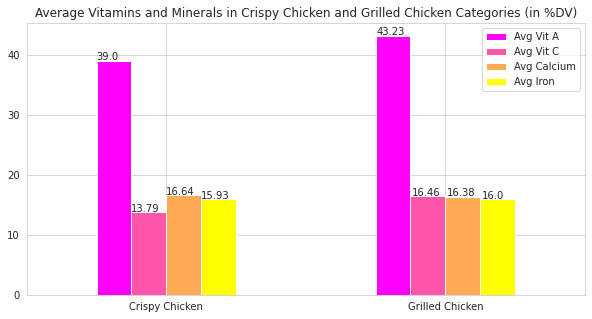

In [ ]:
# Plot a bar chart for visual comparison
avg_vita = [avg_crispy_vita, avg_grilled_vita]
avg_vitc = [avg_crispy_vitc, avg_grilled_vitc]
avg_calc = [avg_crispy_calc, avg_grilled_calc]
avg_iron = [avg_crispy_iron, avg_grilled_iron]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_vm = pd.DataFrame({'Avg Vit A': avg_vita,
                   'Avg Vit C': avg_vitc,
                   'Avg Calcium': avg_calc,
                   'Avg Iron': avg_iron}, index=index)
ax = avg_vm.plot.bar(rot=0, colormap='spring', figsize=(10,5))
ax.set_title("Average Vitamins and Minerals in Crispy Chicken and Grilled Chicken Categories (in %DV)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can concluded that Crispy Chicken category has higher average amount of vitamin C and lower average amount of vitamin A, calcium, and iron than Grilled Chicken category.

So, to answer Problem 3, despite the health aspects, menu items in Grilled Chicken category has more nutritional values in terms of the average amount of dietary fiber, cholesterol, vitamin A & C, calcium, and iron than menu items in Crispy Chicken category. While Crispy Chicken category has higher average amount of calories, sodium, and sugar than Grilled Chicken category. To determine whether a food item is healthy or not, we have to do lab test. In the mean time, eat wisely.

# Case 4

# Whole Egg vs Egg Whites

Problem #4 What about ordering egg
whites instead of whole
eggs?

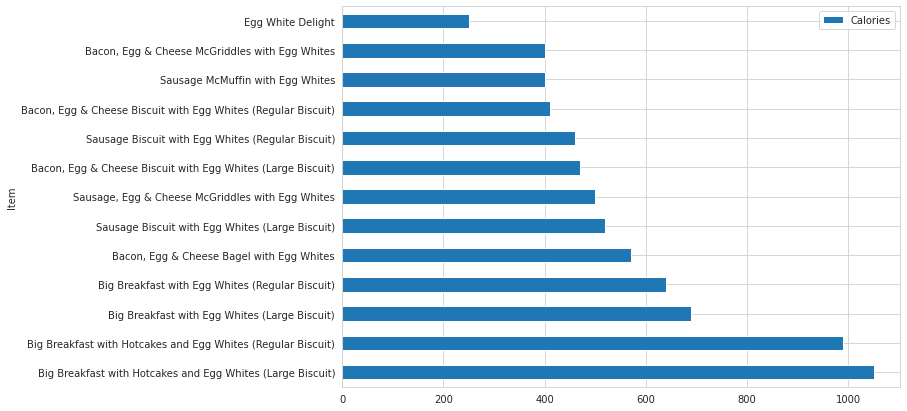

In [ ]:
# Exploring the amount of calories on Crispy Chicken category
whites = df[df['Item'].str.contains('Egg White')]
whites_cal = pd.DataFrame({'Item': whites.Item, 'Calories': whites.Calories})
whites_sort = whites_cal.sort_values('Calories', ascending=False)
whites_sort.plot.barh(x='Item', y='Calories', figsize= (10,7))

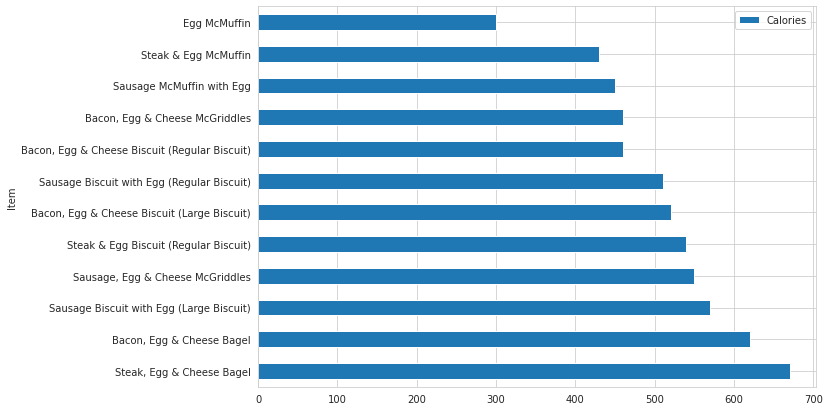

In [ ]:
# Exploring the amount of calories on Whole Eggs category
whole = df[df['Item'].str.contains('Egg')] 
whole = whole[~whole['Item'].str.contains('White')]
whole_cal = pd.DataFrame({'Item': whole.Item, 'Calories': whole.Calories})
whole_sort = whole_cal.sort_values('Calories', ascending=False)
whole_sort.plot.barh(x='Item', y='Calories', figsize= (10,7))

In [ ]:
# Average calories on Egg Whites Category
avg_whites_cal = whites.Calories.mean(axis=0)
print("Average calories on Egg Whites category is ", round(avg_whites_cal, 2), "Cal.")

# Average calories on Whole Egg Category
avg_whole_cal = whole.Calories.mean(axis=0)
print("Average calories on Whole Egg category is ", round(avg_whole_cal, 2), "Cal.")

Average calories on Egg Whites category is  565.38 Cal.
Average calories on Whole Egg category is  506.67 Cal.


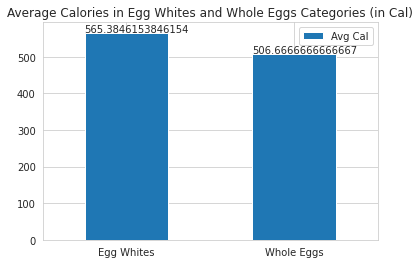

In [ ]:
# Plot a bar chart for visual comparison
avg_egg_cal = [avg_whites_cal, avg_whole_cal]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_cal = pd.DataFrame({'Avg Cal': avg_egg_cal,}, index=index)
ax = avg_egg_cal.plot.bar(rot=0)
ax.set_title("Average Calories in Egg Whites and Whole Eggs Categories (in Cal)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

From analysis above, we can conclude that items in Egg Whites category has higher average amount of calories than items in Whole Eggs category.

Now, let's look at cholesterol and sodium in them!

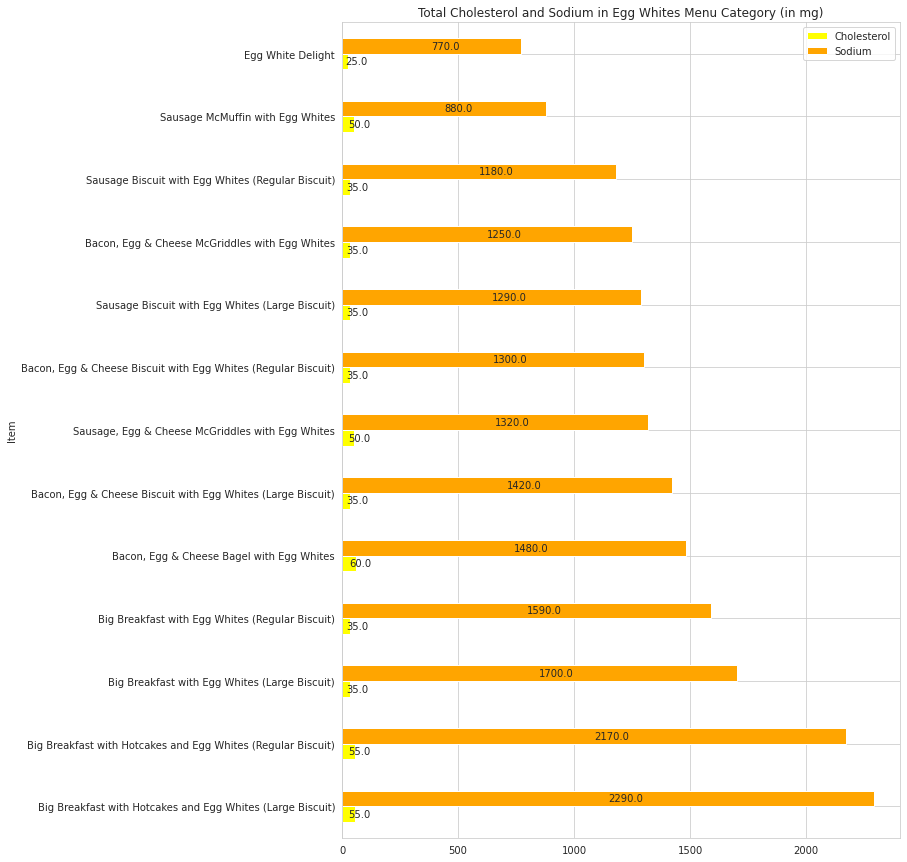

In [ ]:
# Get the amount of cholesterol and sodium in Egg Whites category
whites_chsod = pd.DataFrame({'Item': whites.Item, 'Cholesterol': whites.Cholesterol, 'Sodium': whites.Sodium})
whites_chsod_sort = whites_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = whites_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['yellow', 'orange'])
ax.set_title("Total Cholesterol and Sodium in Egg Whites Menu Category (in mg)")
#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_x() * 1.005, p.get_width() * 1.005))
#ax = crispy.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

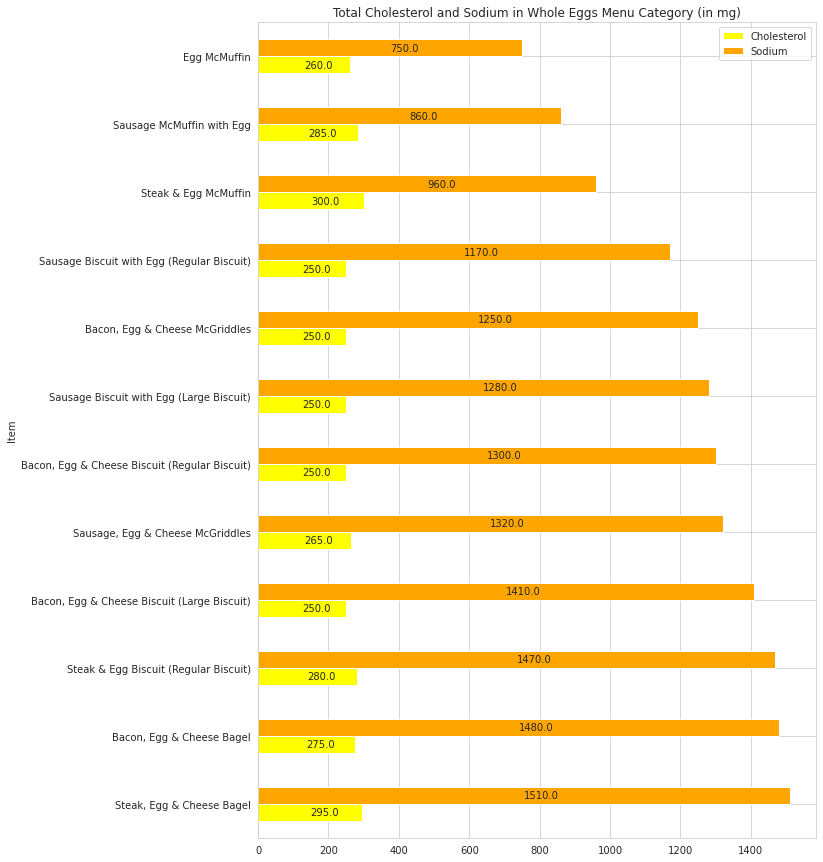

In [ ]:
# Get the amount of cholesterol and sodium in Whole Whites category
whole_chsod = pd.DataFrame({'Item': whole.Item, 'Cholesterol': whole.Cholesterol, 'Sodium': whole.Sodium})
whole_chsod_sort = whole_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = whole_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['yellow', 'orange'])
ax.set_title("Total Cholesterol and Sodium in Whole Eggs Menu Category (in mg)")
#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_x() * 1.005, p.get_width() * 1.005))
#ax = crispy.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Note: As stated in previous problem, the amount of cholesterol in this menu set is not always directly proportional to the amount of sodium. 

Now let's compare the average amount of those nutrients in both categories.

In [ ]:
# Get the average of sodium and cholesterol amount in Egg Whites category
avg_whites_sod = round(whites.Sodium.mean(axis=0), 2)
avg_whites_ch = round(whites.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Egg Whites category is ", avg_whites_sod, "mg, while the average amount of cholesterol is ", avg_whites_ch, "mg.")

# Get the average of sodium and cholesterol amount in Whole Eggs category
avg_whole_sod = round(whole.Sodium.mean(axis=0), 2)
avg_whole_ch = round(whole.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Whole Eggs category is ", avg_whole_sod, "mg, while the average amount of cholesterol is ", avg_whole_ch, "mg.")

The average amount of sodium in Egg Whites category is  1433.85 mg, while the average amount of cholesterol is  41.54 mg.
The average amount of sodium in Whole Eggs category is  1230.0 mg, while the average amount of cholesterol is  267.5 mg.


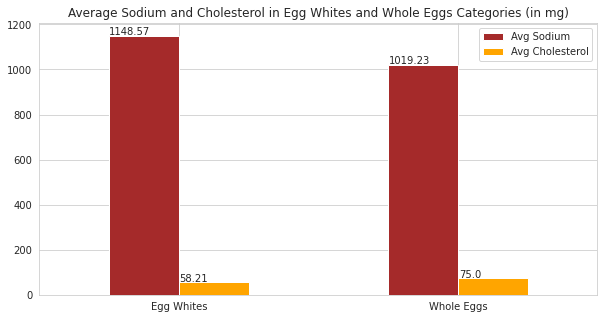

In [ ]:
# Plot a bar chart for visual comparison
avg_egg_sod = [avg_whites_sod, avg_whole_sod]
avg_egg_ch = [avg_whites_ch, avg_whole_ch]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_sodch = pd.DataFrame({'Avg Sodium': avg_sod,
                   'Avg Cholesterol': avg_ch}, index=index)
ax = avg_egg_sodch.plot.bar(rot=0, color=['brown', 'orange'], figsize=(10,5))
ax.set_title("Average Sodium and Cholesterol in Egg Whites and Whole Eggs Categories (in mg)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#plt.barh(['Avg Sodium on Crispy Chicken items', 'Avg Cholesterol on Crispy Chicken items', 'Avg Sodium on Grilled Chicken items', 'Avg Cholesterol on Grilled Chicken items'], [avg_crispy_sod, avg_crispy_ch, avg_grilled_sod, avg_grilled_ch])

We can conclude that Egg Whites category has higher average amount of sodium, and lower average cholesterol amount than Whole Eggs category.

Now, let's take a look at the amount of sugars and dietary fiber in both category.

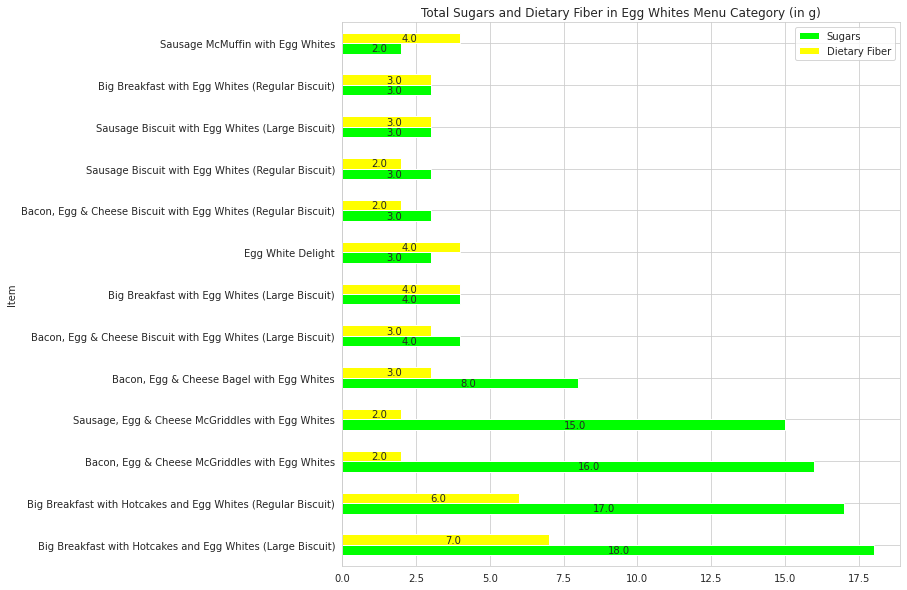

In [ ]:
# Get the amount of sugar and dietary fiber in Egg Whites category
whites_sdf = pd.DataFrame({'Item': whites.Item, 'Sugars': whites.Sugars, 'Dietary Fiber': whites['Dietary Fiber']})
whites_sdf_sort = whites_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = whites_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['lime', 'yellow'])
ax.set_title("Total Sugars and Dietary Fiber in Egg Whites Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

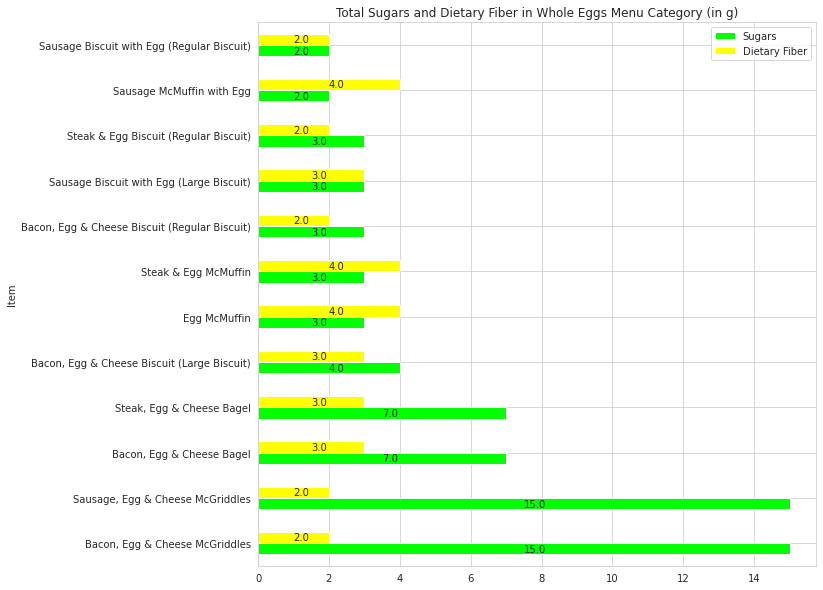

In [ ]:
# Get the amount of sugar and dietary fiber in Whole Eggs category
whole_sdf = pd.DataFrame({'Item': whole.Item, 'Sugars': whole.Sugars, 'Dietary Fiber': whole['Dietary Fiber']})
whole_sdf_sort = whole_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = whole_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['lime', 'yellow'])
ax.set_title("Total Sugars and Dietary Fiber in Whole Eggs Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of sugars and dietary fiber on both categories.

In [ ]:
# Get the average of sugars and dietary fiber amount in Egg Whites category
avg_whites_sug = round(whites.Sugars.mean(axis=0), 2)
avg_whites_df = round(whites['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Egg Whites category is ", avg_whites_sug, "g, while the average amount of dietary fiber is ", avg_whites_df, "g.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_whole_sug = round(whole.Sugars.mean(axis=0), 2)
avg_whole_df = round(whole['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Whole Whites category is ", avg_whole_sug, "g, while the average amount of dietary fiber is ", avg_whole_df, "g.")

The average amount of sugars in Egg Whites category is  7.62 g, while the average amount of dietary fiber is  3.46 g.
The average amount of sugars in Whole Whites category is  5.58 g, while the average amount of dietary fiber is  2.83 g.


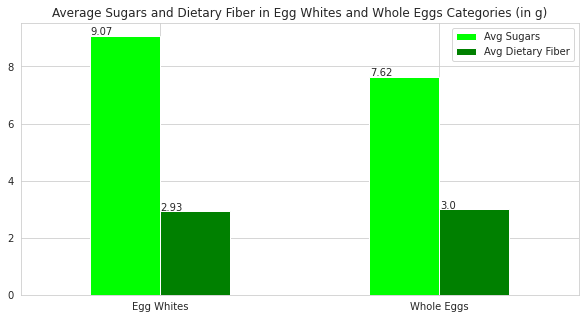

In [ ]:
# Plot a bar chart for visual comparison
avg_egg_sug = [avg_whites_sug, avg_whole_sug]
avg_egg_df = [avg_whites_df, avg_whole_df]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_sdf = pd.DataFrame({'Avg Sugars': avg_sug,
                   'Avg Dietary Fiber': avg_df}, index=index)
ax = avg_egg_sdf.plot.bar(rot=0, color=['lime', 'green'], figsize=(10,5))
ax.set_title("Average Sugars and Dietary Fiber in Egg Whites and Whole Eggs Categories (in g)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Egg Whites category has higher average amount of sugars and dietary fiber than Whole Eggs category.

Now take a look on the amount of vitamins and minerals in both categories. the types of vitamins and minerals that are in the dataset are vitamin A & C, calcium, and iron. All in daily value percentages (%DV).

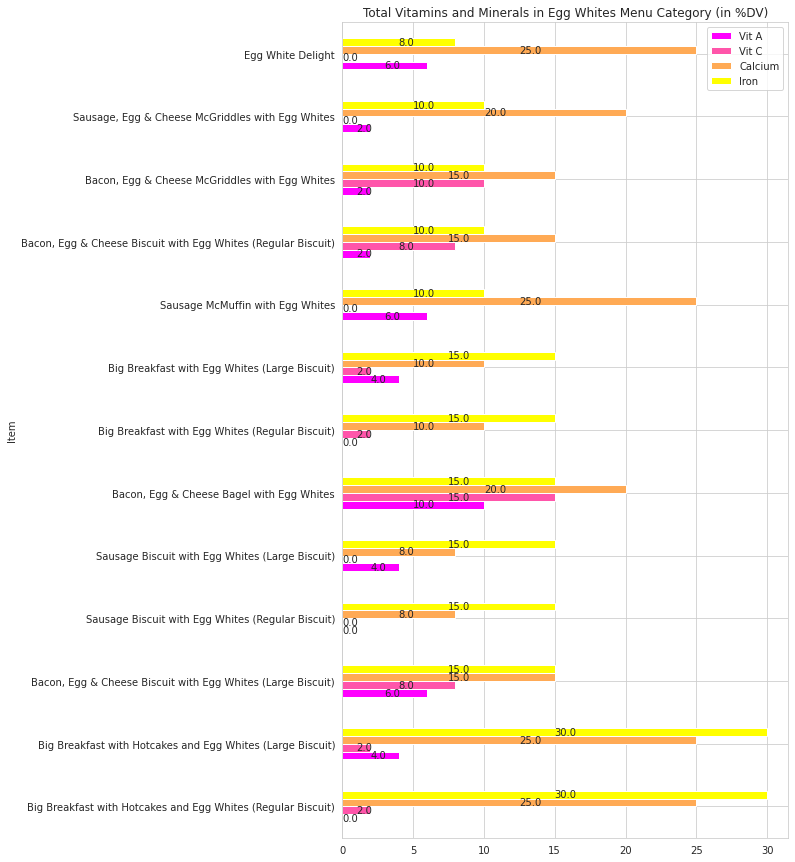

In [ ]:
# Get the amount of vitamins and minerals in Egg Whites category
whites_vm = pd.DataFrame({'Item': whites.Item, 'Vit A': whites['Vitamin A (% Daily Value)'], 'Vit C': whites['Vitamin C (% Daily Value)'], 'Calcium': whites['Calcium (% Daily Value)'], 'Iron': whites['Iron (% Daily Value)']})
whites_vm_sort = whites_vm.sort_values('Iron', ascending=False) #sort by iron amount
ax = whites_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='spring')
ax.set_title("Total Vitamins and Minerals in Egg Whites Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

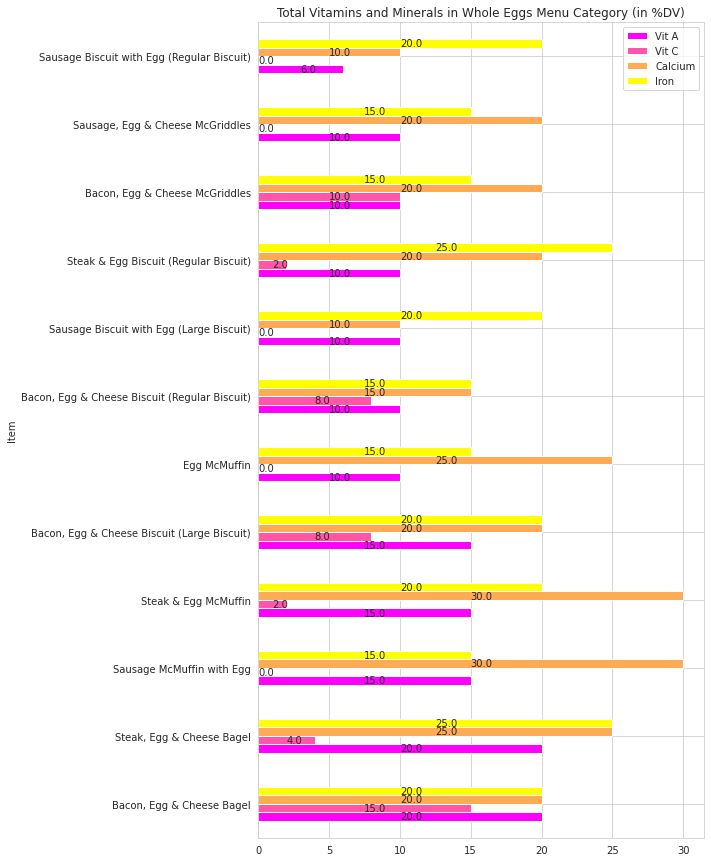

In [ ]:
# Get the amount of vitamins and minerals in Whole Eggs category
whole_vm = pd.DataFrame({'Item': whole.Item, 'Vit A': whole['Vitamin A (% Daily Value)'], 'Vit C': whole['Vitamin C (% Daily Value)'], 'Calcium': whole['Calcium (% Daily Value)'], 'Iron': whole['Iron (% Daily Value)']})
whole_vm_sort = whole_vm.sort_values('Vit A', ascending=False) #sort by iron amount
ax = whole_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='spring')
ax.set_title("Total Vitamins and Minerals in Whole Eggs Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of vitamins and minerals on both categories

In [ ]:
# Get the average of vitamins and minerals in Egg Whites category
avg_whites_vita = round(whites_vm['Vit A'].mean(axis=0), 2)
avg_whites_vitc = round(whites_vm['Vit C'].mean(axis=0), 2)
avg_whites_calc = round(whites_vm['Calcium'].mean(axis=0), 2)
avg_whites_iron = round(whites_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Egg Whites category is ", avg_whites_vita, "%DV,", avg_whites_vitc, "%DV,", avg_whites_calc, "%DV, and", avg_whites_iron, "%DV.")

# Get the average of vitamins and minerals in Whole Eggs category
avg_whole_vita = round(whole_vm['Vit A'].mean(axis=0), 2)
avg_whole_vitc = round(whole_vm['Vit C'].mean(axis=0), 2)
avg_whole_calc = round(whole_vm['Calcium'].mean(axis=0), 2)
avg_whole_iron = round(whole_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Whole Eggs category is ", avg_whole_vita, "%DV,", avg_whole_vitc, "%DV,", avg_whole_calc, "%DV, and", avg_whole_iron, "%DV.")

The average amount of Vit A, Vit C, Calcium, and Iron respectively in Egg Whites category is  3.54 %DV, 3.77 %DV, 17.0 %DV, and 15.23 %DV.
The average amount of Vit A, Vit C, Calcium, and Iron respectively in Whole Eggs category is  12.58 %DV, 4.08 %DV, 20.42 %DV, and 18.75 %DV.


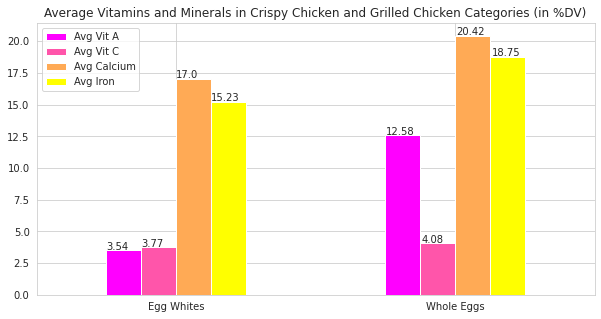

In [ ]:
# Plot a bar chart for visual comparison
avg_egg_vita = [avg_whites_vita, avg_whole_vita]
avg_egg_vitc = [avg_whites_vitc, avg_whole_vitc]
avg_egg_calc = [avg_whites_calc, avg_whole_calc]
avg_egg_iron = [avg_whites_iron, avg_whole_iron]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_vm = pd.DataFrame({'Avg Vit A': avg_egg_vita,
                   'Avg Vit C': avg_egg_vitc,
                   'Avg Calcium': avg_egg_calc,
                   'Avg Iron': avg_egg_iron}, index=index)
ax = avg_egg_vm.plot.bar(rot=0, colormap='spring', figsize=(10,5))
ax.set_title("Average Vitamins and Minerals in Crispy Chicken and Grilled Chicken Categories (in %DV)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can concluded that Egg Whites category has lower average amount of vitamin A & C, calcium, and iron than Egg Whites category.

So, to answer Problem 4, despite the health aspects, menu items in Egg Whites category has more nutritional values in terms of the average amount of calorie, sodium, sugar, dietary fiber, vitamin A & C, calcium, and iron than menu items in Whole Eggs category. While Whole Eggs category has higher average amount of cholesterol than Egg Whites category. To determine whether a food item is healthy or not, we have to do lab test. In the mean time, eat wisely.

In [ ]:
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
df.Category.value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


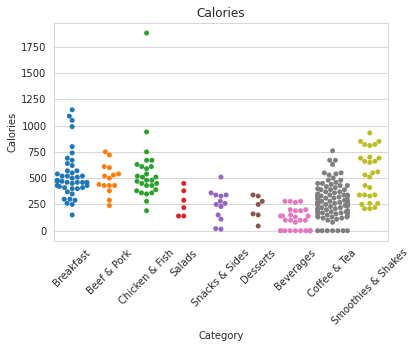

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


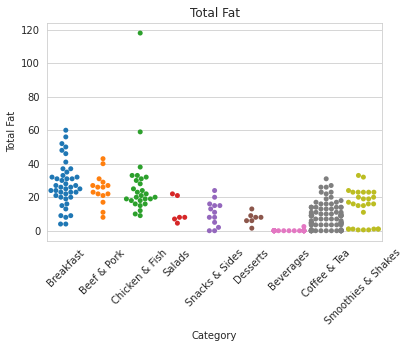

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; yo

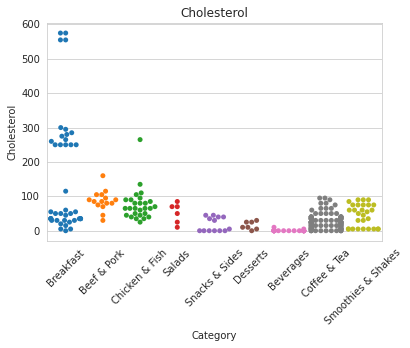

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


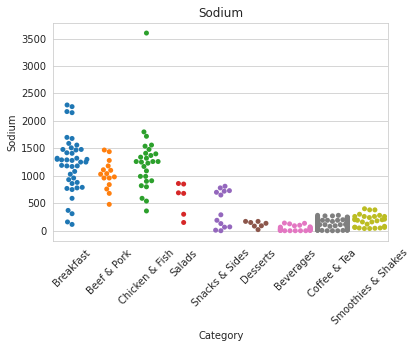

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; y

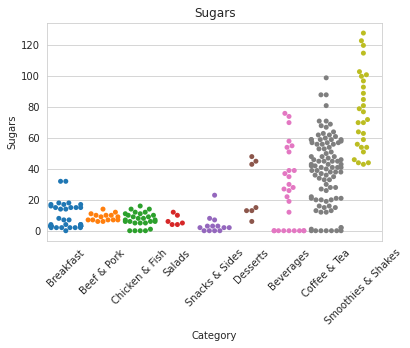

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


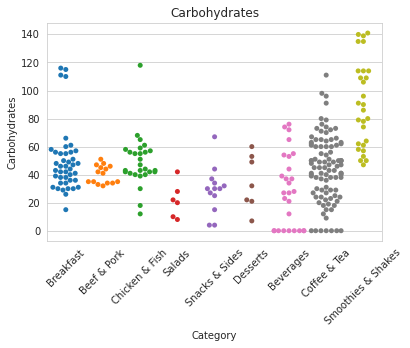

In [ ]:
measures = ['Calories', 'Total Fat', 'Cholesterol','Sodium', 'Sugars', 'Carbohydrates']

for m in measures:   
    plot = sns.swarmplot(x="Category", y=m, data=df)
    plt.setp(plot.get_xticklabels(), rotation=45)
    plt.title(m)
    plt.show()

In [ ]:
print('Highest Calorie meal: {} \n\
       Highest Fat meal: {} \n\
       Highest Cholesterol meal: {} \n\
       Highest Sodium meal: {} \n\
       Highest Sugar meal: {} \n\
       Highest Carb meal: {}'.format(df.Item[df['Calories'].idxmax()],\
                                     df.Item[df['Total Fat'].idxmax()],\
                                     df.Item[df['Cholesterol'].idxmax()],\
                                     df.Item[df['Sodium'].idxmax()],\
                                     df.Item[df['Sugars'].idxmax()],\
                                     df.Item[df['Carbohydrates'].idxmax()]))

Highest Calorie meal: Chicken McNuggets (40 piece) 
       Highest Fat meal: Chicken McNuggets (40 piece) 
       Highest Cholesterol meal: Big Breakfast with Hotcakes (Regular Biscuit) 
       Highest Sodium meal: Chicken McNuggets (40 piece) 
       Highest Sugar meal: McFlurry with M&M’s Candies (Medium) 
       Highest Carb meal: Chocolate Shake (Large)


In [ ]:
print('Lowest Calorie meal: {} \n\
       Lowest Fat meal: {} \n\
       Lowest Cholesterol meal: {} \n\
       Lowest Sodium meal: {} \n\
       Lowest Sugar meal: {} \n\
       Lowest Carb meal: {}'.format(df.Item[df['Calories'].idxmin()],\
                                     df.Item[df['Total Fat'].idxmin()],\
                                     df.Item[df['Cholesterol'].idxmin()],\
                                     df.Item[df['Sodium'].idxmin()],\
                                     df.Item[df['Sugars'].idxmin()],\
                                     df.Item[df['Carbohydrates'].idxmin()]))

NameError: ignored

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os 
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("menu.csv")
print(df.shape[0])

Saving menu.csv to menu (3).csv
260


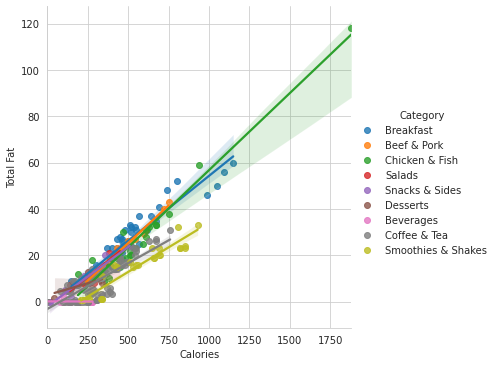

In [ ]:
sns.lmplot(x="Calories", y="Total Fat", hue="Category", data=df)

# Clustering Data Mc Donald

In [ ]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("menu.csv")
print(df.shape[0])

Saving menu.csv to menu (4).csv
260


In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
df.head() #Menampilkan 5 baris pertama dari dataset

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
 
#menghapus kolom ke 0, 1 2 (Category, Item, Serving Size ) karena data pada kolom tidak bisa diolah)
 
cols = [0,1,2]
df.drop(df.columns[cols],axis=1,inplace=True)

In [ ]:
df.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Calories                       260 non-null    int64  
 1   Calories from Fat              260 non-null    int64  
 2   Total Fat                      260 non-null    float64
 3   Total Fat (% Daily Value)      260 non-null    int64  
 4   Saturated Fat                  260 non-null    float64
 5   Saturated Fat (% Daily Value)  260 non-null    int64  
 6   Trans Fat                      260 non-null    float64
 7   Cholesterol                    260 non-null    int64  
 8   Cholesterol (% Daily Value)    260 non-null    int64  
 9   Sodium                         260 non-null    int64  
 10  Sodium (% Daily Value)         260 non-null    int64  
 11  Carbohydrates                  260 non-null    int64  
 12  Carbohydrates (% Daily Value)  260 non-null    int

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.05559952, -0.0821929 , -0.08311032, ..., -0.32457391,
         0.23705644,  0.83448094],
       [-0.44735768, -0.43483572, -0.44935918, ..., -0.32457391,
         0.23705644,  0.0304813 ],
       [ 0.57121352,  0.62309274,  0.6036063 , ..., -0.32457391,
         0.23705644,  0.26019549],
       ...,
       [-0.21230278, -0.22325003, -0.22045364, ..., -0.32457391,
         0.23705644, -0.19923288],
       [ 1.2763782 ,  1.25784981,  1.29032291, ..., -0.32457391,
         2.2974324 , -0.19923288],
       [ 0.17945537,  0.12939279,  0.14579522, ..., -0.32457391,
         0.53139586, -0.42894706]])

In [ ]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 1 1 3 1 1 1 1 1 2 2
 2 0 0 0 0 2 3 3 3 2 3 2 2 2 3 2 3 2 2 2 2 2 3 3 3 3 1 3 2 2 3 3 2 3 3 3 3
 3 3 3 3 0 2 2 1 4 2 0 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
df["Clus_km"] = labels
df.head(5)

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Clus_km
0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,2
1,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,2
2,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,2
3,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,2
4,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,2


In [ ]:
df.groupby('Clus_km').mean()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,289.356725,69.444444,7.771930,11.959064,4.467836,22.157895,0.166667,23.742690,8.035088,132.192982,5.549708,48.000000,16.000000,0.947368,3.766082,40.929825,7.421053,11.614035,8.988304,22.888889,2.526316
1,911.111111,450.000000,50.000000,77.000000,15.555556,78.333333,0.055556,292.222222,97.666667,1925.555556,80.333333,82.000000,27.444444,4.888889,19.444444,10.555556,33.777778,8.444444,5.222222,19.888889,26.111111
2,374.864865,160.270270,17.783784,27.378378,5.702703,28.567568,0.216216,73.108108,24.351351,812.972973,33.810811,35.216216,11.702703,2.540541,10.459459,6.081081,18.945946,19.135135,5.054054,16.405405,14.297297
3,531.428571,241.190476,26.857143,41.404762,10.166667,50.928571,0.357143,110.119048,36.642857,1316.190476,54.833333,46.261905,15.428571,2.809524,11.142857,7.857143,26.357143,17.166667,10.309524,17.738095,18.809524
4,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,1.000000,265.000000,89.000000,3600.000000,150.000000,118.000000,39.000000,6.000000,24.000000,1.000000,87.000000,0.000000,15.000000,8.000000,25.000000


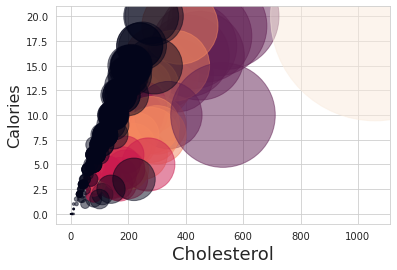

In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Cholesterol', fontsize=18)
plt.ylabel('Calories', fontsize=16)

plt.show()